In [22]:
# LOADING LIBRARIES
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from collections import Counter
from scipy.stats import norm

In [23]:
# SETTING WORKING PATH -- SAVE THE SCRIPT ON THE SAME FOLDER WITH
# THE INITIAL DATA SETS.
path = os.getcwd()

In [24]:
# FUNCTIONS FOR PREPROCESSING

def drop_df_nas_columns(df):
    """
    DROPPING INPLACE COLUMNS THAT CONTAIN MORE THAN 70% OF MISSING VALUES
    @param: df -> The dataframe to check for missing values
    """ 
    missing_values_per_column = df.isnull().sum(axis = 0)
    df_size = df.shape
    nrows = df.shape[0]
    for col, value in missing_values_per_column.items():
        if value / nrows > 0.7:
            print(f'Dropping column: {col}')
            df.drop(col, inplace=True, axis=1)

In [25]:
# READING INITIAL DATASETS
df_logged_in = pd.read_csv(os.path.join(path, 'Initial Data', 'BPI2016_Clicks_Logged_In.csv'), sep=";", encoding='latin-1',low_memory=False)
df_logged_in.name = "Clicks_Logged_In"
df_complaints = pd.read_csv(os.path.join(path, 'Initial Data', 'BPI2016_Complaints.csv'), sep=";", encoding='latin-1')
df_complaints.name = "Complaints"
df_messages = pd.read_csv(os.path.join(path, 'Initial Data', 'BPI2016_Werkmap_Messages.csv'), sep=";", encoding='latin-1')
df_messages.name = "Werkmap_Messages"
df_questions = pd.read_csv(os.path.join(path, 'Initial Data', 'BPI2016_Questions.csv'), sep=";", encoding='latin-1')
df_questions.name = "Questions"

In [26]:
df_list = [df_logged_in, df_complaints, df_messages, df_questions]
for df in df_list:
    print(f"Cleaning missing values for dataframe: {df.name} \n")
    print(f"{df.name} information BEFORE dropping columns containing more than 70% of missing data \n\n")
    print(f"{df.name} initial columns: {df.columns}\n")
    print(f"{df.name} initial shape: {df.shape}\n")
    print(f"{df.name} columns and their NA values: \n\n")
    print(df.isnull().sum(axis = 0))
    drop_df_nas_columns(df)
    print("\n")
    print(f"{df.name} information AFTER dropping columns containing more than 70% of missing data \n\n")
    print(f"{df.name} final columns: {df.columns}\n")
    print(f"{df.name} final shape: {df.shape}\n\n")

Cleaning missing values for dataframe: Clicks_Logged_In 

Clicks_Logged_In information BEFORE dropping columns containing more than 70% of missing data 


Clicks_Logged_In initial columns: Index(['CustomerID', 'AgeCategory', 'Gender', 'Office_U', 'Office_W',
       'SessionID', 'IPID', 'TIMESTAMP', 'VHOST', 'URL_FILE', 'PAGE_NAME',
       'REF_URL_category', 'page_load_error', 'page_action_detail', 'tip',
       'service_detail', 'xps_info', 'page_action_detail_EN',
       'service_detail_EN', 'tip_EN'],
      dtype='object')

Clicks_Logged_In initial shape: (7174934, 20)

Clicks_Logged_In columns and their NA values: 


CustomerID                     0
AgeCategory                    0
Gender                         0
Office_U                       0
Office_W                       0
SessionID                      0
IPID                           0
TIMESTAMP                      0
VHOST                          0
URL_FILE                       0
PAGE_NAME                      0
REF_URL_

In [27]:
df_logged_in['PAGE_NAME'] = "Page: " + df_logged_in['PAGE_NAME']
df_logged_in # Will choose CustomerID, TIMESTAMP, PAGE_NAME

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,page_load_error
0,2025826,50-65,V,313,313,12956475,620841,2015-10-05 10:12:56.880000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,Page: 50plus,0
1,2025826,50-65,V,313,313,13243433,620841,2015-09-30 15:14:35.943000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,Page: 50plus,0
2,1503890,30-39,V,247,247,14805466,1690840,2015-09-01 19:35:06.707000000,digid.werk.nl,/portal/page/portal/home/diensten/aanvragen-tw,Page: aanvragen-tw,0
3,2063574,50-65,M,296,301,12710639,1632512,2015-11-06 10:47:42.137000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/uwv-die...,Page: 50plus,0
4,2185161,18-29,V,327,327,44281847,757955,2016-01-11 18:44:07.877000000,www.werk.nl,/werk_nl/werknemer/uitkering-aanvragen/bijstan...,Page: bijstandsuitkering,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7174929,1524682,30-39,M,230,230,13731498,929774,2015-07-22 14:22:13.983000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,Page: vacatures_bij_mijn_cv,0
7174930,710204,40-49,M,296,293,21416869,968898,2015-09-08 14:08:38.753000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,Page: vacatures_bij_mijn_cv,0
7174931,1524682,30-39,M,230,230,13731498,929774,2015-07-22 13:48:17.177000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,Page: vacatures_bij_mijn_cv,0
7174932,1524682,30-39,M,230,230,5244342,929774,2015-07-17 13:13:44.037000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/va...,Page: vacatures_bij_mijn_cv,0


In [28]:
# CHECKING UNIQUE SESSION IDs PER CUSTOMER
len(df_logged_in['SessionID'].unique().tolist())
sessions_per_customer = df_logged_in.groupby('CustomerID')['SessionID'].nunique().sort_values()
print(sessions_per_customer)

CustomerID
90834        1
1692568      1
1691597      1
2200449      1
1689670      1
          ... 
2033620    364
2036141    423
984160     433
1389451    450
1682449    494
Name: SessionID, Length: 26647, dtype: int64


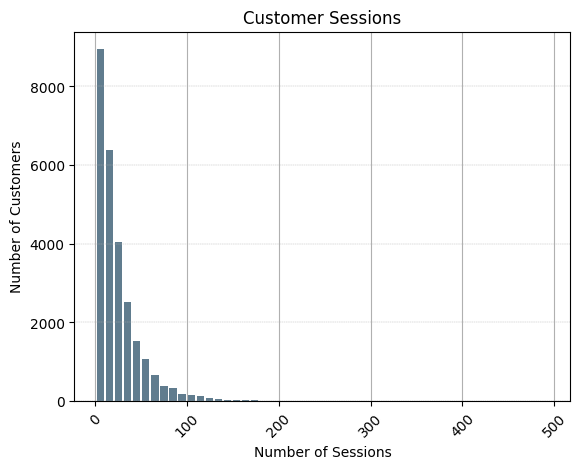

In [29]:
sessions_per_customer.plot.hist(grid=True, bins=50, rwidth=0.8, color='#607c8e')
plt.title(f"Customer Sessions")
plt.xlabel('Number of Sessions')
plt.xticks(rotation = 45)
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle = '--', linewidth = 0.3)

count    26647.000000
mean        24.791309
std         26.707406
min          1.000000
25%          8.000000
50%         17.000000
75%         33.000000
max        494.000000
Name: SessionID, dtype: float64


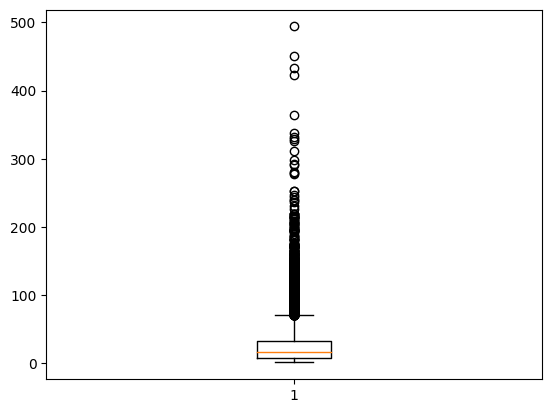

In [30]:
# CHECKING DESCRIPTION OF NUMBER OF SESSIONS PER CUSTOMER
print(sessions_per_customer.describe())
plt.boxplot(sessions_per_customer)
plt.show()

In [ ]:
# SPLITTING THE DATA BASED ON THE NUMBER OF SESSIONS PER CUSTOMER
# FINALLY NOT SO USEFULL
"""
sessions = pd.DataFrame(sessions_per_customer)
customers_with_max_10_sessions = sessions['SessionID'] <= 10
customers_with_11_30_sessions = (sessions['SessionID'] > 10) & (sessions['SessionID'] <= 30)
customers_with_min_30_sessions =  sessions['SessionID'] > 30

customers_max_10_sessions =[]
for k,v in customers_with_max_10_sessions.items():
    if v is True:
        customers_max_10_sessions.append(k)

customers_11_30_sessions =[]
for k,v in customers_with_11_30_sessions.items():
    if v is True:
        customers_11_30_sessions.append(k)

customers_min_30_sessions =[]
for k,v in customers_with_min_30_sessions.items():
    if v is True:
        customers_min_30_sessions.append(k)

print(len(customers_max_10_sessions))
print(len(customers_11_30_sessions))
print(len(customers_min_30_sessions))

#page_counter_max_10_sessions = Counter(pages_customers_with_max_10_sessions)
#page_counter_with_11_30_sessions = Counter(pages_customers_with_11_30_sessions)
#page_counter_min_30_sessions = Counter(pages_customers_with_min_30_sessions)

# CHECKING WHICH PAGES WERE USED BY CUSTOMERS WITH SMALL NUMBER OF SESSIONS (<10),
# MEDIUM NUMBER OF SESSIONS (11-30) AND LARGE NUMBER OF SESSIONS (>30)
pages_customers_with_max_10_sessions = df_logged_in[df_logged_in.CustomerID.isin(customers_max_10_sessions)]
pages_customers_with_11_30_sessions = df_logged_in[df_logged_in.CustomerID.isin(customers_11_30_sessions)]
pages_customers_with_min_30_sessions = df_logged_in[df_logged_in.CustomerID.isin(customers_min_30_sessions)]
"""

"\nsessions = pd.DataFrame(sessions_per_customer)\ncustomers_with_max_10_sessions = sessions['SessionID'] <= 10\ncustomers_with_11_30_sessions = (sessions['SessionID'] > 10) & (sessions['SessionID'] <= 30)\ncustomers_with_min_30_sessions =  sessions['SessionID'] > 30\n\ncustomers_max_10_sessions =[]\nfor k,v in customers_with_max_10_sessions.items():\n    if v is True:\n        customers_max_10_sessions.append(k)\n\ncustomers_11_30_sessions =[]\nfor k,v in customers_with_11_30_sessions.items():\n    if v is True:\n        customers_11_30_sessions.append(k)\n\ncustomers_min_30_sessions =[]\nfor k,v in customers_with_min_30_sessions.items():\n    if v is True:\n        customers_min_30_sessions.append(k)\n\nprint(len(customers_max_10_sessions))\nprint(len(customers_11_30_sessions))\nprint(len(customers_min_30_sessions))\n\n#page_counter_max_10_sessions = Counter(pages_customers_with_max_10_sessions)\n#page_counter_with_11_30_sessions = Counter(pages_customers_with_11_30_sessions)\n#page_

In [ ]:
# ADDING A NEW COLUMN TO df_logged_in DESCRIBING
# THE SESSION ORDER OF THE EVENT PER CUSTOMER
df_logged_in["Session_Order"] = 1
customers = df_logged_in['CustomerID'].unique().tolist()
temp_logged_in = []
for count,customer in enumerate(customers):
    print(f"Percentage completed: {count/len(customers) * 100} %")
    customer_data = df_logged_in[df_logged_in['CustomerID']==customer]
    customer_data = customer_data.sort_values(by = 'SessionID', ascending=True)
    c = 0
    prev_session = 00000000
    for _, row in customer_data.iterrows():
        if prev_session == row['SessionID']:
            row['Session_Order'] = c
        else:
            c += 1
            row['Session_Order'] = c
        prev_session = row['SessionID']
        #print(row)
        temp_logged_in.append(row)
        #print(temp_logged_in)
df_pages_visited = pd.DataFrame(temp_logged_in)
df_pages_visited

Percentage completed: 0.0 %
Percentage completed: 0.0037527676661537885 %
Percentage completed: 0.007505535332307577 %
Percentage completed: 0.011258302998461365 %
Percentage completed: 0.015011070664615154 %
Percentage completed: 0.01876383833076894 %
Percentage completed: 0.02251660599692273 %
Percentage completed: 0.026269373663076523 %
Percentage completed: 0.03002214132923031 %
Percentage completed: 0.033774908995384094 %
Percentage completed: 0.03752767666153788 %
Percentage completed: 0.04128044432769167 %
Percentage completed: 0.04503321199384546 %
Percentage completed: 0.04878597965999925 %
Percentage completed: 0.052538747326153046 %
Percentage completed: 0.05629151499230683 %
Percentage completed: 0.06004428265846062 %
Percentage completed: 0.0637970503246144 %
Percentage completed: 0.06754981799076819 %
Percentage completed: 0.07130258565692198 %
Percentage completed: 0.07505535332307577 %
Percentage completed: 0.07880812098922955 %
Percentage completed: 0.08256088865538334

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,page_load_error,Session_Order
4472570,2025826,50-65,V,313,313,81032,620841,2015-07-22 16:16:52.663000000,www.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,Page: taken,0,1
1617331,2025826,50-65,V,313,313,81032,620841,2015-07-22 16:03:45.223000000,www.werk.nl,/werk_nl/werknemer/werkmap,Page: werkmap,0,1
4476183,2025826,50-65,V,313,313,81032,620841,2015-07-22 16:19:52.080000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,Page: taken,0,1
4476101,2025826,50-65,V,313,313,81032,620841,2015-07-22 16:20:01.397000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,Page: taken,0,1
4476090,2025826,50-65,V,313,313,81032,620841,2015-07-22 16:24:21,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,Page: taken,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661758,2074149,18-29,M,330,330,25285949,1672012,2015-09-27 10:50:01.010000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap,Page: mijn_werkmap,0,1
3684086,2074149,18-29,M,330,330,25285949,1672012,2015-09-27 10:48:46.617000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap,Page: mijn_werkmap,0,1
3663989,1815106,18-29,M,230,230,28842601,1585643,2015-10-31 16:16:45.367000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap,Page: mijn_werkmap,0,1
3668553,1815106,18-29,M,230,230,28842601,1585643,2015-10-31 16:18:25.410000000,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap,Page: mijn_werkmap,0,1


In [ ]:
df_pages_visited.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_with_session_order.csv'), index=False)
df_pages_visited.Session_Order.describe()

count    7.174934e+06
mean     2.439729e+01
std      3.186901e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.400000e+01
75%      3.100000e+01
max      4.940000e+02
Name: Session_Order, dtype: float64

In [ ]:
pages_visited_first_10_sessions = df_pages_visited[df_pages_visited['Session_Order'] <= 10]
pages_visited_between_11_30_sessions = df_pages_visited[(df_pages_visited['Session_Order'] > 10) & (df_pages_visited['Session_Order'] <= 30)]
pages_visited_after_30_sessions = df_pages_visited[df_pages_visited['Session_Order'] > 30]

In [31]:
df_logged_in['TIMESTAMP']

0          2015-10-05 10:12:56.880000000
1          2015-09-30 15:14:35.943000000
2          2015-09-01 19:35:06.707000000
3          2015-11-06 10:47:42.137000000
4          2016-01-11 18:44:07.877000000
                       ...              
7174929    2015-07-22 14:22:13.983000000
7174930    2015-09-08 14:08:38.753000000
7174931    2015-07-22 13:48:17.177000000
7174932    2015-07-17 13:13:44.037000000
7174933    2015-09-29 16:04:12.370000000
Name: TIMESTAMP, Length: 7174934, dtype: object

In [32]:
df_complaints['ComplaintTopic_EN'] = "Complain: " + df_complaints['ComplaintTopic_EN']
df_complaints # Will choose CustomerID, ContactDate (to datetime), ComplaintTopic_EN

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ComplaintDossierID,ComplaintID,ContactDate,ContactChannelID,ComplaintThemeID,ComplaintSubthemeID,ComplaintTopicID,ComplaintTheme,ComplaintSubtheme,ComplaintTopic,ComplaintTheme_EN,ComplaintSubtheme_EN,ComplaintTopic_EN
0,1945807,50-65,M,230,233,197,220,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,Complain: (Revision) Decision not/too late taken
1,733565,30-39,M,296,290,198,221,2016-01-12,8,1,5,1,behandelingsduur,n.v.t.,(herzienings)besluit wordt niet / te laat genomen,duration of treatment,N.A.,Complain: (Revision) Decision not/too late taken
2,413563,18-29,V,327,327,225,255,2016-02-01,8,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"Complain: (Multiple) requests, to little avail"
3,2027840,30-39,M,327,321,149,165,2015-12-11,5,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"Complain: (Multiple) requests, to little avail"
4,1202227,30-39,V,280,283,3,6,2015-07-07,5,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"Complain: (Multiple) requests, to little avail"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1373382,30-39,V,257,261,88,102,2015-11-05,8,3,2,68,dienstverlening,bereikbaarheid / toegankelijkheid,wijzigingsformulier niet bereikbaar,services,availability/accessibility,Complain: change form unreachable
285,1604792,50-65,V,257,291,72,85,2015-10-16,8,3,3,69,dienstverlening,betaling,"wijzigingsformulier niet verwerkt, betaling on...",services,payment,"Complain: change form is not processed, incorr..."
286,1774398,50-65,M,305,304,179,198,2016-01-05,8,3,3,69,dienstverlening,betaling,"wijzigingsformulier niet verwerkt, betaling on...",services,payment,"Complain: change form is not processed, incorr..."
287,1840727,30-39,M,296,291,183,202,2016-01-06,8,3,3,69,dienstverlening,betaling,"wijzigingsformulier niet verwerkt, betaling on...",services,payment,"Complain: change form is not processed, incorr..."


In [33]:
df_complaints['ContactDate'] = pd.to_datetime(df_complaints['ContactDate'])
df_complaints['ContactDate'] = df_complaints['ContactDate'].dt.strftime("%Y-%m-%d %H:%M:%S.%f")
df_complaints['ContactDate']

0      2016-01-12 00:00:00.000000
1      2016-01-12 00:00:00.000000
2      2016-02-01 00:00:00.000000
3      2015-12-11 00:00:00.000000
4      2015-07-07 00:00:00.000000
                  ...            
284    2015-11-05 00:00:00.000000
285    2015-10-16 00:00:00.000000
286    2016-01-05 00:00:00.000000
287    2016-01-06 00:00:00.000000
288    2015-10-16 00:00:00.000000
Name: ContactDate, Length: 289, dtype: object

In [34]:
df_messages['HandlingChannelID'] = "Channel " + df_messages['HandlingChannelID'].apply(str)
df_messages # Will choose CustomerID, EventDateTime, HandlingChannelID

,CustomerID,AgeCategory,Gender,Office_U,Office_W,EventDateTime,EventType,HandlingChannelID
0,2032131,18-29,M,271,271,2015-11-02 01:36:53.0000000,Werkmap message,Channel 1
1,2032131,18-29,M,271,271,2015-11-05 21:35:43.0000000,Werkmap message,Channel 1
2,2032131,18-29,M,271,271,2015-11-06 15:47:15.0000000,Werkmap message,Channel 1
3,2085395,18-29,V,280,280,2015-10-20 23:44:39.0000000,Werkmap message,Channel 2
4,2085395,18-29,V,280,280,2016-01-20 23:04:25.0000000,Werkmap message,Channel 2
...,...,...,...,...,...,...,...,...
66053,2204562,18-29,M,327,313,2016-02-17 17:33:45.0000000,Werkmap message,Channel 2
66054,2063643,18-29,V,230,230,2015-09-07 19:18:22.0000000,Werkmap message,Channel 1
66055,1979722,40-49,V,330,332,2015-11-16 08:44:11.0000000,Werkmap message,Channel 1
66056,1979722,40-49,V,330,332,2015-11-18 15:06:53.0000000,Werkmap message,Channel 1


In [35]:
df_questions['QuestionTopic_EN'] = "Question: " + df_questions['QuestionTopic_EN']
df_questions # Will choose CustomerID, ContactDate + ContactTimeStart , QuestionTopic_EN

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ContactDate,ContactTimeStart,ContactTimeEnd,QuestionThemeID,QuestionSubthemeID,QuestionTopicID,QuestionTheme,QuestionSubtheme,QuestionTopic,QuestionTheme_EN,QuestionSubtheme_EN,QuestionTopic_EN
0,1876596,18-29,M,257,261,2015-08-24,14:00:34.0000000,14:05:23.0000000,41,28861,28896,WN WW,Sollicitatie (WWZ 1-7-2015),Sollicitatieplicht: Moet ik solliciteren als i...,WN WW,Application (WWZ 1 7 2015),Question: Job Duty: Should I apply if I go bac...
1,722160,18-29,M,305,305,2015-08-27,11:50:08.0000000,11:55:34.0000000,41,15159,11672,WN WW,Betaling,Wanneer is/wordt mijn WW-uitkering overgemaakt?,WN WW,Payment,Question: When is/are transferred my unemploym...
2,1536943,18-29,M,327,327,2015-08-20,11:01:16.0000000,11:09:11.0000000,41,28377,28503,WN WW,Betaling (WWZ 1-7-2015),Wanneer is/wordt mijn WW-uitkering overgemaakt?,WN WW,Payment (WWZ 1 7 2015),Question: When is/are transferred my unemploym...
3,1816718,18-29,M,238,238,2015-08-27,12:19:28.0000000,12:25:51.0000000,41,28377,28503,WN WW,Betaling (WWZ 1-7-2015),Wanneer is/wordt mijn WW-uitkering overgemaakt?,WN WW,Payment (WWZ 1 7 2015),Question: When is/are transferred my unemploym...
4,1983285,40-49,M,296,290,2015-08-27,13:54:03.0000000,13:58:00.0000000,41,9838,24466,WN WW,Correspondentie,Ik heb een brief gekregen met het verzoek om c...,WN WW,Correspondence,Question: I received a letter with the request...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123398,2104461,18-29,V,327,327,2015-10-26,14:14:52.0000000,14:16:16.0000000,41,28379,28444,WN WW,Formulier Inkomstenopgave (WWZ 1-7-2015),Invullen: Moet ik een vergoeding opgeven op he...,WN WW,Income form declaration (WWZ 1 7 2015),Question: Filling: Should I give compensation ...
123399,1787453,50-65,V,280,280,2015-10-27,16:25:26.0000000,16:34:48.0000000,31,9101,5689,UWV Algemeen,Loonheffingskorting,Wat is loonheffingskorting?,UWV General,Loonheffingskorting,Question: What's payroll tax?
123400,1768788,18-29,M,257,261,2015-10-29,14:00:12.0000000,14:01:27.0000000,41,20319,9321,WN WW,Beslissing en bezwaar,Kunt u mij een kopie van de beslissing toesturen?,WN WW,Ruling and opposition,Question: Can you send me a copy of the decision?
123401,2139996,18-29,M,230,230,2016-02-29,13:59:34.0000000,14:03:04.0000000,41,20312,11529,WN WW,Afspraken,Ik ben te laat voor mijn afspraak. Wat moet ik...,WN WW,appointments,Question: I'm late for my appointment. What sh...


In [36]:
df_questions['Timestamp'] = df_questions['ContactDate'] + ' ' + df_questions['ContactTimeStart']
df_questions['Timestamp']

0         2015-08-24 14:00:34.0000000
1         2015-08-27 11:50:08.0000000
2         2015-08-20 11:01:16.0000000
3         2015-08-27 12:19:28.0000000
4         2015-08-27 13:54:03.0000000
                     ...             
123398    2015-10-26 14:14:52.0000000
123399    2015-10-27 16:25:26.0000000
123400    2015-10-29 14:00:12.0000000
123401    2016-02-29 13:59:34.0000000
123402    2015-10-26 13:51:38.0000000
Name: Timestamp, Length: 123403, dtype: object

In [37]:
# CREATING A LIST WITH THE COLUMNS OF EACH DF TO BE MERGED
# THE SELECTION HERE CAN CHANGE LATER FOR FURTHER ANALYSIS
logged_in_cols = ['CustomerID', 'TIMESTAMP', 'PAGE_NAME']
complaints_cols = ['CustomerID', 'ContactDate', 'ComplaintTopic_EN']
messages_cols = ['CustomerID', 'EventDateTime', 'HandlingChannelID']
questions_cols = ['CustomerID', 'Timestamp', 'QuestionTopic_EN']

In [39]:
# SELECTING THE APPROPRIATE COLUMNS FROM EACH DATASET BEFORE PROCEEDING
df_logged_in_select = df_logged_in[logged_in_cols]
df_logged_in_select['Source'] = df_logged_in.name
df_complaints_select = df_complaints[complaints_cols]
df_complaints_select['Source'] = df_complaints.name
df_messages_select = df_messages[messages_cols]
df_messages_select['Source'] = df_messages.name
df_questions_select = df_questions[questions_cols]
df_questions_select['Source'] = df_questions.name

pages_visited_first_10_sessions = pages_visited_first_10_sessions[logged_in_cols]
pages_visited_first_10_sessions['Source'] = df_logged_in.name
pages_visited_between_11_30_sessions = pages_visited_between_11_30_sessions[logged_in_cols]
pages_visited_between_11_30_sessions['Source'] = df_logged_in.name
pages_visited_after_30_sessions = pages_visited_after_30_sessions[logged_in_cols]
pages_visited_after_30_sessions['Source'] = df_logged_in.name


#pages_customers_with_max_10_sessions_select = pages_customers_with_max_10_sessions[logged_in_cols]
#pages_customers_with_max_10_sessions_select['Source'] = df_logged_in.name
#pages_customers_with_11_30_sessions_select = pages_customers_with_11_30_sessions[logged_in_cols]
#pages_customers_with_11_30_sessions_select['Source'] = df_logged_in.name
#pages_customers_with_min_30_sessions_select = pages_customers_with_min_30_sessions[logged_in_cols]
#pages_customers_with_min_30_sessions_select['Source'] = df_logged_in.name

C:\Users\odyky\AppData\Local\Temp\ipykernel_21752\4164192377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logged_in_select['Source'] = df_logged_in.name
C:\Users\odyky\AppData\Local\Temp\ipykernel_21752\4164192377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaints_select['Source'] = df_complaints.name
C:\Users\odyky\AppData\Local\Temp\ipykernel_21752\4164192377.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

"\npages_visited_first_10_sessions = pages_visited_first_10_sessions[logged_in_cols]\npages_visited_first_10_sessions['Source'] = df_logged_in.name\npages_visited_between_11_30_sessions = pages_visited_between_11_30_sessions[logged_in_cols]\npages_visited_between_11_30_sessions['Source'] = df_logged_in.name\npages_visited_after_30_sessions = pages_visited_after_30_sessions[logged_in_cols]\npages_visited_after_30_sessions['Source'] = df_logged_in.name\n"

In [40]:
# RENAMING COLUMNS BEFORE MERGING
df_logged_in_select.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
df_complaints_select.rename(columns = {'ContactDate':'Timestamp', 'ComplaintTopic_EN':'Activity'}, inplace = True)
df_messages_select.rename(columns = {'EventDateTime':'Timestamp', 'HandlingChannelID':'Activity'}, inplace = True)
df_questions_select.rename(columns = {'QuestionTopic_EN':'Activity'}, inplace = True)

pages_visited_first_10_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
pages_visited_between_11_30_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
pages_visited_after_30_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)

#pages_customers_with_max_10_sessions_select.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
#pages_customers_with_11_30_sessions_select.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
#pages_customers_with_min_30_sessions_select.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)

C:\Users\odyky\AppData\Local\Temp\ipykernel_21752\171705021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logged_in_select.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
C:\Users\odyky\AppData\Local\Temp\ipykernel_21752\171705021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complaints_select.rename(columns = {'ContactDate':'Timestamp', 'ComplaintTopic_EN':'Activity'}, inplace = True)
C:\Users\odyky\AppData\Local\Temp\ipykernel_21752\171705021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [41]:
# CONCATANATING THE FINAL SELECTED COLUMNS OF EACH DATAFRAME
df_concat = pd.concat([df_logged_in_select, df_complaints_select, df_messages_select, df_questions_select], axis=0)

In [42]:
print(df_concat.shape)
print(df_concat.columns)

(7364684, 4)
Index(['CustomerID', 'Timestamp', 'Activity', 'Source'], dtype='object')


In [43]:
# CREATE A DATAFRAME CONTAINING CUSTOMER INFORMATION FOR FILTERING
# AND FURTHER ANALYSIS
customerID = []
ageCategory = []
gender = []
for df in df_list:
    customerID += (df['CustomerID'].tolist())
    ageCategory += (df['AgeCategory'].tolist())
    gender += (df['Gender'].tolist())

df_customers = pd.DataFrame(
    {'CustomerID': customerID,
     'AgeCategory': ageCategory,
     'Gender': gender
    }
)
df_customers

,CustomerID,AgeCategory,Gender
0,2025826,50-65,V
1,2025826,50-65,V
2,1503890,30-39,V
3,2063574,50-65,M
4,2185161,18-29,V
...,...,...,...
7364679,2104461,18-29,V
7364680,1787453,50-65,V
7364681,1768788,18-29,M
7364682,2139996,18-29,M


In [44]:
df_customers_analyze = df_customers.drop_duplicates().reset_index(drop=True)
print(f"The number of unique customers in the datasets is: {len(df_customers_analyze)}")
print(df_customers_analyze)

The number of unique customers in the datasets is: 27412
       CustomerID AgeCategory Gender
0         2025826       50-65      V
1         1503890       30-39      V
2         2063574       50-65      M
3         2185161       18-29      V
4         2074173       40-49      M
...           ...         ...    ...
27407      516864       30-39      V
27408     2225975       50-65      V
27409     2234864       18-29      V
27410     2237001       40-49      V
27411      111386       40-49      M

[27412 rows x 3 columns]


            CustomerID      
Gender               M     V
AgeCategory                 
18-29             3586  3747
30-39             3347  3211
40-49             3024  3008
50-65             4150  3339


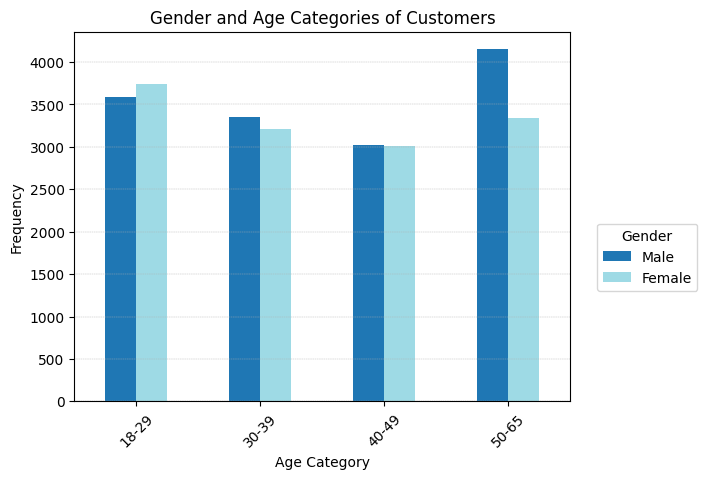

In [45]:
#plt.plot(df_customers_analyze)
counts = df_customers_analyze.groupby(['AgeCategory', 'Gender']).count().unstack()
print(counts)
ax = counts.plot(kind='bar',stacked = False, colormap='tab20')

plt.xlabel ('Age Category')
plt.xticks(rotation = 45)
plt.ylabel ('Frequency')
plt.title('Gender and Age Categories of Customers')
plt.legend(title='Gender', bbox_to_anchor=(1.04, 0.5), loc="upper left", labels=['Male', 'Female'])
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()

In [46]:
# MERGING df_concat with df_customers TO ADD CUSTOMER INFORMATION TO THE FINAL CSV
# ALSO TO ENABLE FILTERING VIA CUSTOMER DETAILS
df_final = pd.concat([df_concat.reset_index(drop=True), df_customers.iloc[:, 1:3].reset_index(drop=True)],axis=1)
print(df_final.shape)
df_final

(7364684, 6)


,CustomerID,Timestamp,Activity,Source,AgeCategory,Gender
0,2025826,2015-10-05 10:12:56.880000000,Page: 50plus,Clicks_Logged_In,50-65,V
1,2025826,2015-09-30 15:14:35.943000000,Page: 50plus,Clicks_Logged_In,50-65,V
2,1503890,2015-09-01 19:35:06.707000000,Page: aanvragen-tw,Clicks_Logged_In,30-39,V
3,2063574,2015-11-06 10:47:42.137000000,Page: 50plus,Clicks_Logged_In,50-65,M
4,2185161,2016-01-11 18:44:07.877000000,Page: bijstandsuitkering,Clicks_Logged_In,18-29,V
...,...,...,...,...,...,...
7364679,2104461,2015-10-26 14:14:52.0000000,Question: Filling: Should I give compensation ...,Questions,18-29,V
7364680,1787453,2015-10-27 16:25:26.0000000,Question: What's payroll tax?,Questions,50-65,V
7364681,1768788,2015-10-29 14:00:12.0000000,Question: Can you send me a copy of the decision?,Questions,18-29,M
7364682,2139996,2016-02-29 13:59:34.0000000,Question: I'm late for my appointment. What sh...,Questions,18-29,M


In [47]:
# EXPORT FINAL DATAFRAMES TO CSV
df_final.to_csv(os.path.join(path, 'Produced Data', 'final.csv'), index=False)

"""
pages_visited_first_10_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
pages_visited_between_11_30_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)
pages_visited_after_30_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)

pages_visited_first_10_sessions.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_first_10_sessions.csv'), index=False)
pages_visited_between_11_30_sessions.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_between_11_30_sessions.csv'), index=False)
pages_visited_after_30_sessions.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_after_30_sessions.csv'), index=False)
"""

#pages_customers_with_max_10_sessions_select.to_csv(os.path.join(path, 'Produced Data', 'logged_in_customers_max_10_sessions.csv'), index=False)
#pages_customers_with_11_30_sessions_select.to_csv(os.path.join(path, 'Produced Data', 'logged_in_customers_11_30_sessions.csv'), index=False)
#pages_customers_with_min_30_sessions_select.to_csv(os.path.join(path, 'Produced Data', 'logged_in_customers_min_30_sessions.csv'), index=False)

"\npages_visited_first_10_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)\npages_visited_between_11_30_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)\npages_visited_after_30_sessions.rename(columns = {'TIMESTAMP':'Timestamp', 'PAGE_NAME':'Activity'}, inplace = True)\n\npages_visited_first_10_sessions.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_first_10_sessions.csv'), index=False)\npages_visited_between_11_30_sessions.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_between_11_30_sessions.csv'), index=False)\npages_visited_after_30_sessions.to_csv(os.path.join(path, 'Produced Data', 'pages_visited_after_30_sessions.csv'), index=False)\n"

In [94]:
# CALCULATING TOTAL DURATION (IN DAYS) OF USAGE OF UWV's SERVICES PER CUSTOMER
df_time_duration_of_usage = df_final.groupby(['CustomerID','AgeCategory', 'Gender']).agg(date_min=('Timestamp', 'min'), date_max=('Timestamp', 'max')).reset_index()
df_time_duration_of_usage['duration']=(pd.to_datetime(df_time_duration_of_usage['date_max'])-pd.to_datetime(df_time_duration_of_usage['date_min'])).dt.days
dur = df_time_duration_of_usage.groupby(['AgeCategory', 'Gender']).agg({'duration': ['mean']})
dur1 = df_time_duration_of_usage.groupby(['AgeCategory', 'Gender'], as_index=False).agg({'duration': ['mean']})
print(dur1)

  AgeCategory Gender    duration
                            mean
0       18-29      M   94.394032
1       18-29      V  108.232720
2       30-39      M  115.796235
3       30-39      V  126.619122
4       40-49      M  131.854828
5       40-49      V  139.042553
6       50-65      M  146.605542
7       50-65      V  150.029650


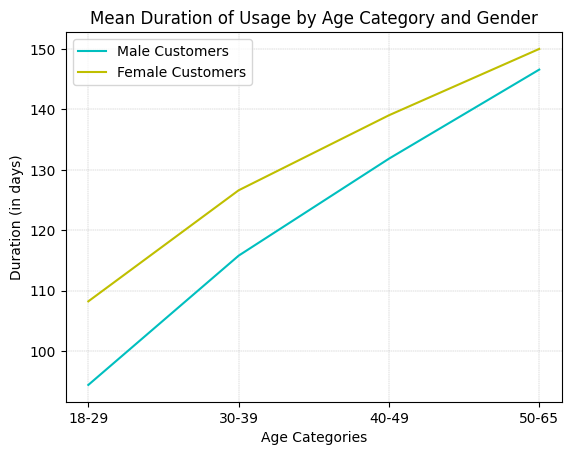

In [117]:
# PLOTTING DURATION OF USAGE OF SERVICES
# BY AGE CATEGORY AND GENDER
#dur.plot(title= "Mean Duration of Usage by Age Category and Gender", xlabel = "Age Categories and Genders", ylabel = "Duration (in days)", color='#607c8e', figsize=(11, 6), legend=False, grid=True)

# Plot a simple line chart
plt.plot(male_mean_duration['AgeCategory'], male_mean_duration.duration['mean'], 'c', label='Male Customers')

# Plot another line on the same chart/graph
plt.plot(female_mean_duration['AgeCategory'], female_mean_duration.duration['mean'], 'y', label='Female Customers')

plt.title('Mean Duration of Usage by Age Category and Gender')
plt.xlabel('Age Categories')
plt.ylabel('Duration (in days)')
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.3)
plt.show()


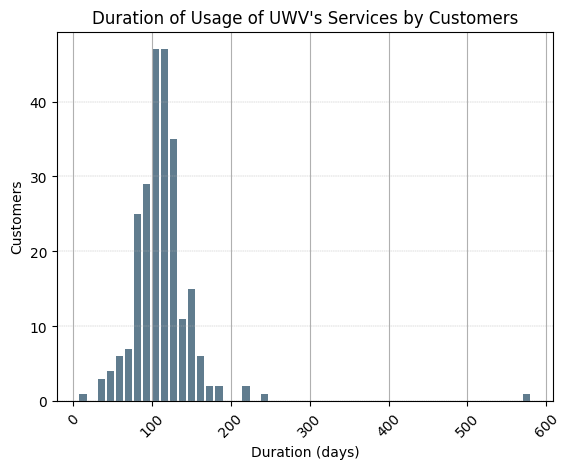

In [43]:
# PLOTTING HISTOGRAM OF DURATION OF USAGE
counts = df_time_duration_of_usage.groupby(['duration']).CustomerID.count()
counts.plot.hist(grid=True, bins=50, rwidth=0.8, color='#607c8e')
plt.title(f"Duration of Usage of UWV's Services by Customers")
plt.xlabel('Duration (days)')
plt.xticks(rotation = 45)
plt.ylabel('Customers')
plt.grid(axis='y', linestyle = '--', linewidth = 0.3)

In [44]:
# FILTERING FINAL DATAFRAME BASED ON AgeCategory
age_categories = df_final['AgeCategory'].unique()
for category in age_categories:
    df_age_categ = df_final[df_final['AgeCategory']==category]
    df_age_categ.drop('AgeCategory', inplace=True, axis=1)
    df_age_categ.to_csv(os.path.join(path, 'Produced Data', f'age_category_{category}_final.csv'), index=False)

C:\Users\odyky\AppData\Local\Temp\ipykernel_21396\1694905461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_categ.drop('AgeCategory', inplace=True, axis=1)
C:\Users\odyky\AppData\Local\Temp\ipykernel_21396\1694905461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_categ.drop('AgeCategory', inplace=True, axis=1)
C:\Users\odyky\AppData\Local\Temp\ipykernel_21396\1694905461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [45]:
# FILTERING CASES WHERE CUSTOMER HAVE COMPLAINT AT LEAST ONCE
customers_with_complaints = df_final.loc[df_final['Source'] == 'Complaints']['CustomerID'].unique().tolist()
df_cases_with_complaints = df_final[df_final['CustomerID'].isin(customers_with_complaints)]
df_cases_with_complaints
df_cases_with_complaints.to_csv(os.path.join(path, 'Produced Data', 'cases_with_complaints_final.csv'), index=False)